In [37]:
import pandas as pd
import ta
import numpy as np
import pickle
import itertools
from datetime import datetime

from alphalens import utils, plotting, performance, tears

import mlfinlab as ml

from utilities import (
    getIndicator, 
    getForwardReturns, getCleanFactor, addGroupingFactor,
    plotFactorQuantileBars, plotCumulativeReturns, plotQuantileCumulativeReturns,
    InformationTable)

from factor_library import volatility, volume

import pyfolio

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [38]:
cusumTrainPrices = pickle.load(open('/home/ubuntu/projects/trading/data/cusumTrainPrices.pkl', 'rb'))
target = pickle.load(open('/home/ubuntu/projects/trading/data/binary_target_5_day.pkl', 'rb'))

In [39]:
for symbol, data in cusumTrainPrices.items():
    
    data = data[data['event'] == 1]
    cusumTrainPrices[symbol] = data

In [40]:
# for symbol, data in cusumTrainPrices.items():
#     cusumTrainPrices[symbol] = data.loc['2015-01-01':]

In [41]:
trailing_volume_window = 20

In [42]:
bbands_data = getIndicator(
    cusumTrainPrices,
    volatility.bbands, n = 5, ndev = 2,
    trailing_volume_n = trailing_volume_window
)
bbands_data = bbands_data.unstack().asfreq('C').stack()
bbands_data

bbihband  bbilband  bbipband   bbiwband
date       symbol                                         
2013-02-18 HLM.JO       0.0       0.0  0.593138  19.680501
2013-02-19 HLM.JO       0.0       0.0  0.312406  16.153533
2013-02-21 HLM.JO       0.0       0.0  0.220560  19.423221
2013-02-25 HLM.JO       0.0       0.0  0.402734  11.678150
2013-02-27 HLM.JO       0.0       0.0  0.050997  25.919477
...                     ...       ...       ...        ...
2017-12-29 TDH.JO       0.0       0.0  0.814607  14.939032
           TKG.JO       0.0       0.0  0.759783   6.579545
           TRU.JO       0.0       0.0  0.721479  13.696737
           VOD.JO       0.0       0.0  0.596823   6.481740
           ZED.JO       0.0       0.0  0.839356  19.487208

[58323 rows x 4 columns]

In [43]:
forward_returns = getForwardReturns(datas = cusumTrainPrices)
forward_returns

1D  event         t1
date       asset                             
2013-01-04 ACT.JO -0.038855      1 2013-01-07
           AEE.JO -0.062500      1 2013-01-07
           AFE.JO  0.060550      1 2013-01-07
           AFT.JO  0.069900      1 2013-01-07
           AFX.JO  0.021739      1 2013-01-07
...                     ...    ...        ...
2017-12-27 TMT.JO       NaN      1 2017-12-28
           TON.JO       NaN      1 2017-12-28
           TRU.JO       NaN      1 2017-12-28
           TWR.JO       NaN      1 2017-12-28
           WBO.JO       NaN      1 2017-12-28

[89920 rows x 3 columns]

In [44]:
bbands_factor_data = getCleanFactor(bbands_data[['bbipband']], forward_returns, quantiles = 10)
bbands_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


,,1D,factor,factor_quantile
date,asset,,,
2013-04-15,ACT.JO,0.014118,0.018349,1.0
2013-04-16,ACT.JO,0.000000,0.405897,5.0
2013-04-18,ACT.JO,0.044084,0.258309,7.0
2013-04-19,ACT.JO,-0.011111,0.625363,6.0
2013-04-30,ACT.JO,-0.033708,0.810840,8.0
...,...,...,...,...
2017-12-14,STXWDM.JO,-0.030055,0.281481,3.0
2017-12-15,STXWDM.JO,-0.008451,0.062097,1.0
2017-12-18,STXWDM.JO,-0.025284,0.078688,1.0


In [45]:
InformationTable(bbands_factor_data)

Information Analysis


,1D
IC Mean,0.007
IC Std.,0.191
Risk-Adjusted IC,0.035
t-stat(IC),NaN
p-value(IC),NaN
IC Skew,NaN
IC Kurtosis,NaN


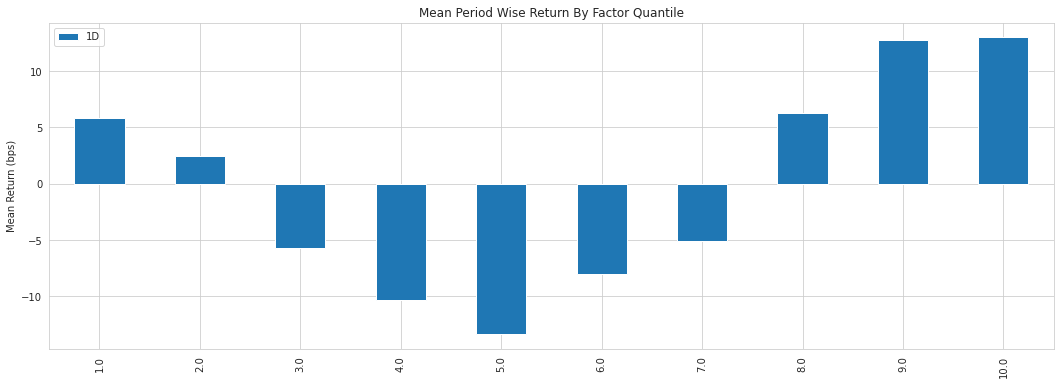

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

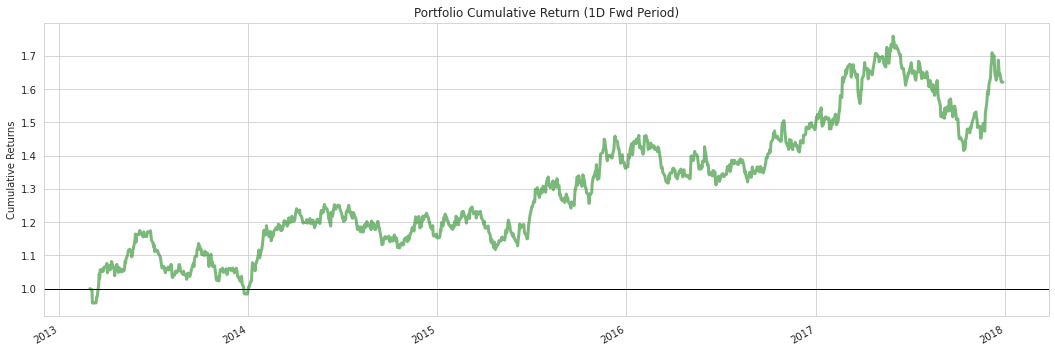

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

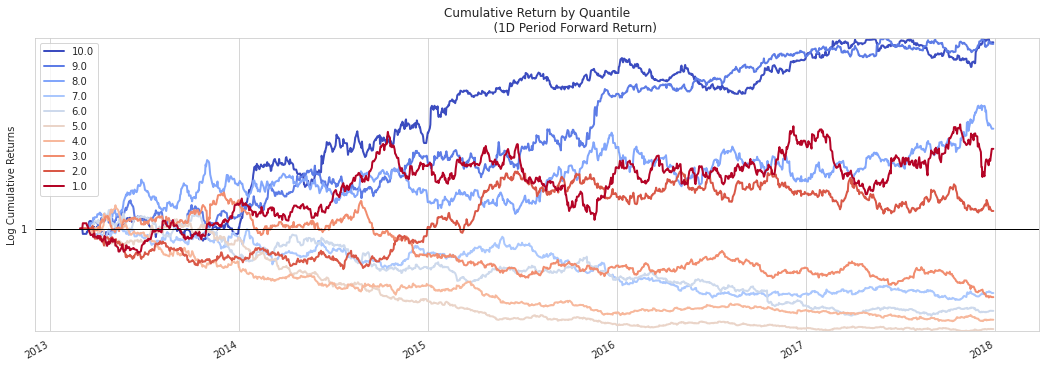

In [46]:
plotFactorQuantileBars(bbands_factor_data)

plotCumulativeReturns(bbands_factor_data[bbands_factor_data['factor_quantile'].isin([1, 2, 9, 10])])

plotQuantileCumulativeReturns(bbands_factor_data)

In [47]:
bbands_iw_factor_data = getCleanFactor(bbands_data[['bbiwband']], forward_returns, quantiles = 10)
bbands_iw_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


,,1D,factor,factor_quantile
date,asset,,,
2013-04-15,ACT.JO,0.014118,16.012214,10.0
2013-04-16,ACT.JO,0.000000,15.360462,9.0
2013-04-18,ACT.JO,0.044084,17.293318,10.0
2013-04-19,ACT.JO,-0.011111,12.912116,9.0
2013-04-30,ACT.JO,-0.033708,11.743306,7.0
...,...,...,...,...
2017-12-14,STXWDM.JO,-0.030055,2.585178,1.0
2017-12-15,STXWDM.JO,-0.008451,3.124955,1.0
2017-12-18,STXWDM.JO,-0.025284,5.171342,1.0


In [48]:
InformationTable(bbands_iw_factor_data)

Information Analysis


,1D
IC Mean,-0.009
IC Std.,0.185
Risk-Adjusted IC,-0.051
t-stat(IC),NaN
p-value(IC),NaN
IC Skew,NaN
IC Kurtosis,NaN


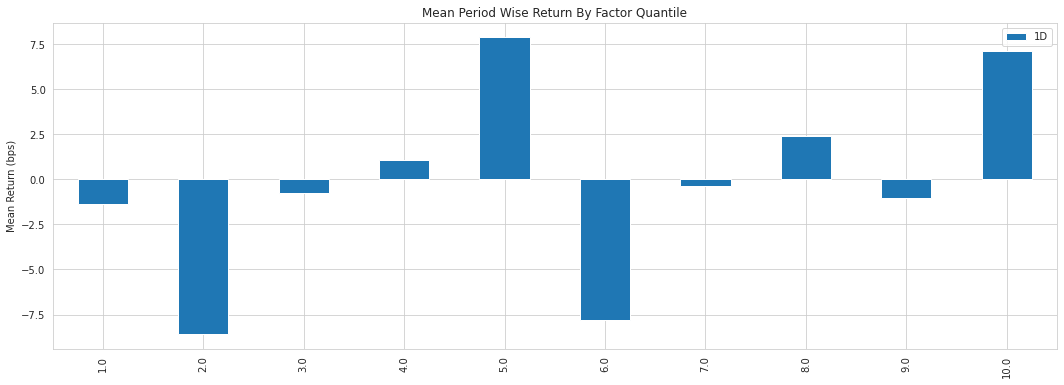

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

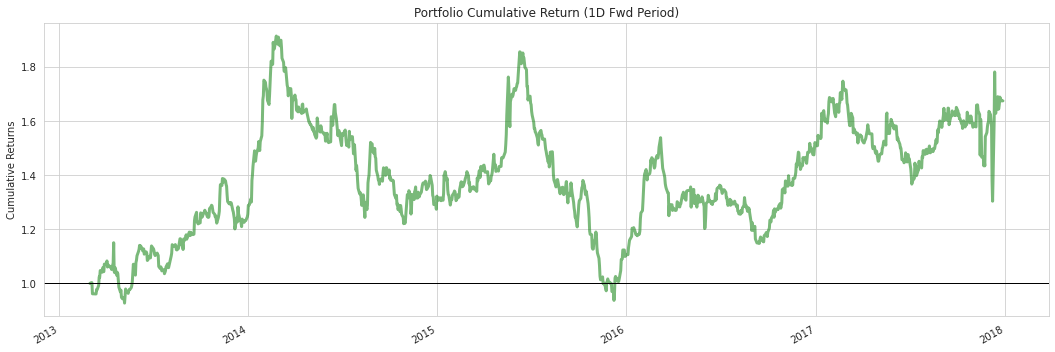

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

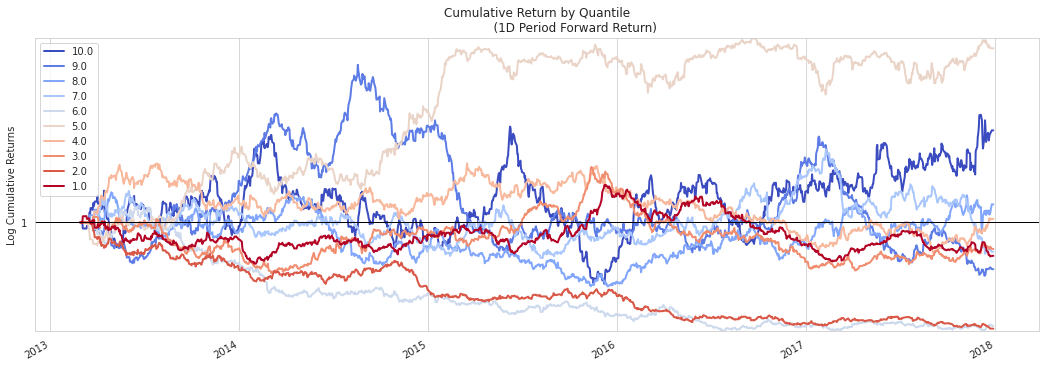

In [49]:
plotFactorQuantileBars(bbands_iw_factor_data)

plotCumulativeReturns(bbands_iw_factor_data[bbands_iw_factor_data['factor_quantile'].isin([1, 2, 9, 10])])

plotQuantileCumulativeReturns(bbands_iw_factor_data)

In [50]:
train = pd.concat([bbands_factor_data['factor_quantile'],
                   target[['label']] ], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']

In [51]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV

In [52]:
def checkCV(X, cv, max_train_size):
    ts = TimeSeriesSplit(n_splits = cv, max_train_size = max_train_size)
    for i, (train_index, test_index) in enumerate(ts.split(X.unstack())):
        
        if len(X.unstack().iloc[train_index, ]) >= max_train_size:
            print(f"Fold {i + 1} -------------------------------------------------------")
            print(f"Train: Length = {len(X.unstack().iloc[train_index, ].index)}")
            print(f"Start date: {X.unstack().iloc[train_index, ].index[0].date()}")
            print(f"End date: {X.unstack().iloc[train_index, ].index[-1].date()} \n")

            print(f"Test: Length =  {len(X.unstack().iloc[test_index, ].index)}")
            print(f"Start date: {X.unstack().iloc[test_index, ].index[0].date()}")
            print(f"End date: {X.unstack().iloc[test_index, ].index[-1].date()}")
            print(f"----------------------------------------------------------------")

In [53]:
checkCV(X, 35, max_train_size = 240)

Fold 7 -------------------------------------------------------
Train: Length = 240
Start date: 2013-03-13
End date: 2014-02-26 

Test: Length =  33
Start date: 2014-02-27
End date: 2014-04-15
----------------------------------------------------------------
Fold 8 -------------------------------------------------------
Train: Length = 240
Start date: 2013-05-03
End date: 2014-04-15 

Test: Length =  33
Start date: 2014-04-16
End date: 2014-06-06
----------------------------------------------------------------
Fold 9 -------------------------------------------------------
Train: Length = 240
Start date: 2013-06-20
End date: 2014-06-06 

Test: Length =  33
Start date: 2014-06-09
End date: 2014-07-24
----------------------------------------------------------------
Fold 10 -------------------------------------------------------
Train: Length = 240
Start date: 2013-08-06
End date: 2014-07-24 

Test: Length =  33
Start date: 2014-07-25
End date: 2014-09-09
------------------------------------

In [54]:
def modelFit(clf, X, y, cv, max_train_size):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    ts = TimeSeriesSplit(n_splits = cv, max_train_size=max_train_size) # 
    for train_index, test_index in ts.split(X.unstack()):

        
        train_X = X.unstack().iloc[train_index, ].stack()
        train_y = y.unstack().iloc[train_index].stack()

        test_X = X.unstack().iloc[test_index, ].stack()
        test_y = y.unstack().iloc[test_index].stack()
        
        if len(train_X.unstack()) >= max_train_size:
            model = clf
            model.fit(
                train_X, 
                train_y)

            cal_model = CalibratedClassifierCV(model, cv = 'prefit')
            cal_model.fit(train_X, train_y)

            probs = pd.DataFrame(
                cal_model.predict_proba(test_X), 
                columns = cal_model.classes_, 
                index = test_X.index)

            probabilities = pd.concat(
                [probabilities, probs])

            preds = pd.DataFrame(
                model.predict(test_X), 
                columns = ['predictions'], 
                index = test_X.index)
            preds['actual'] = test_y

            predictions = pd.concat(
                [predictions, preds])
    #         print('DONE!!!!!!!!!!!!!!!!!!!!!')
    return predictions, probabilities

In [55]:
clf = LogisticRegression(random_state=42)
predictions, probabilities = modelFit(clf, X, y, cv = 35, max_train_size = 240)

In [56]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol          
2014-02-27 ABG.JO  0.502798
           ACT.JO  0.502300
           ADH.JO  0.505787
           ADI.JO  0.502300
           AFX.JO  0.504790
...                     ...
2017-12-22 TWR.JO  0.497405
           WBO.JO  0.496168
2017-12-27 CTA.JO  0.496168
           MCZ.JO  0.497051
           RBP.JO  0.497758

[57337 rows x 1 columns]

In [57]:
clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


,,1D,factor,factor_quantile
date,asset,,,
2014-02-27,ACT.JO,-0.008439,0.502300,2.0
2014-03-03,ACT.JO,-0.042553,0.504292,4.0
2014-03-07,ACT.JO,0.022222,0.502798,2.0
2014-03-20,ACT.JO,-0.036957,0.504790,4.0
2014-03-24,ACT.JO,-0.051919,0.505787,5.0
...,...,...,...,...
2017-12-14,STXWDM.JO,-0.030055,0.497405,4.0
2017-12-15,STXWDM.JO,-0.008451,0.497758,5.0
2017-12-18,STXWDM.JO,-0.025284,0.497758,5.0


In [58]:
InformationTable(clf_factor_data)

Information Analysis


,1D
IC Mean,0.009
IC Std.,0.167
Risk-Adjusted IC,0.053
t-stat(IC),NaN
p-value(IC),NaN
IC Skew,NaN
IC Kurtosis,NaN


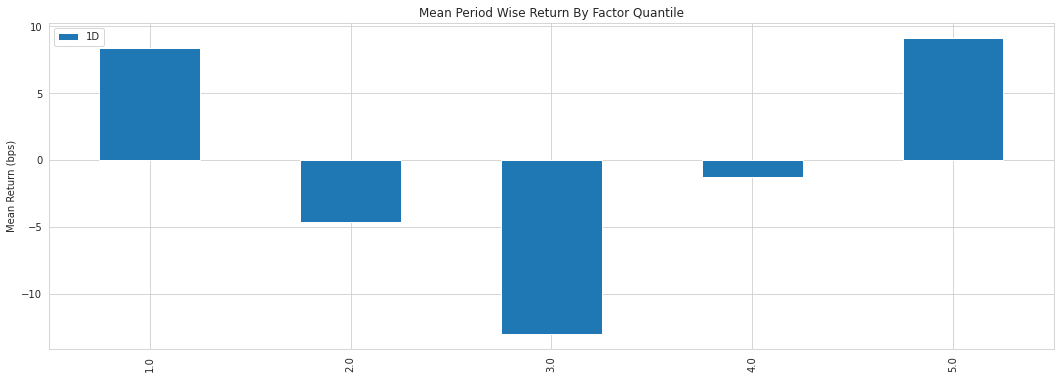

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

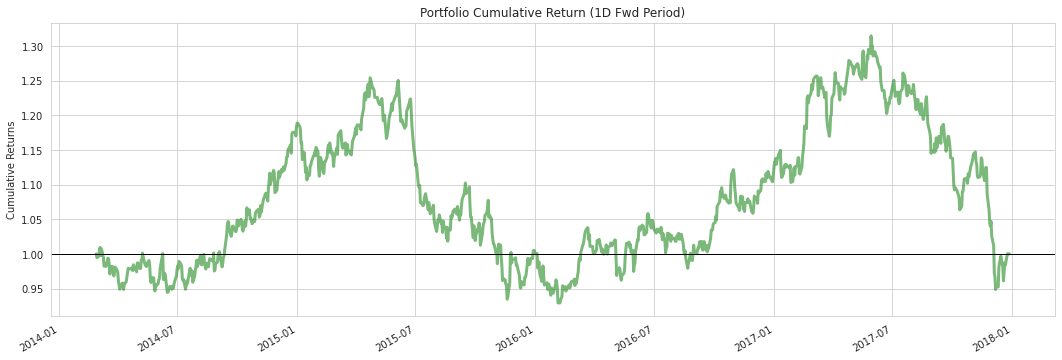

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

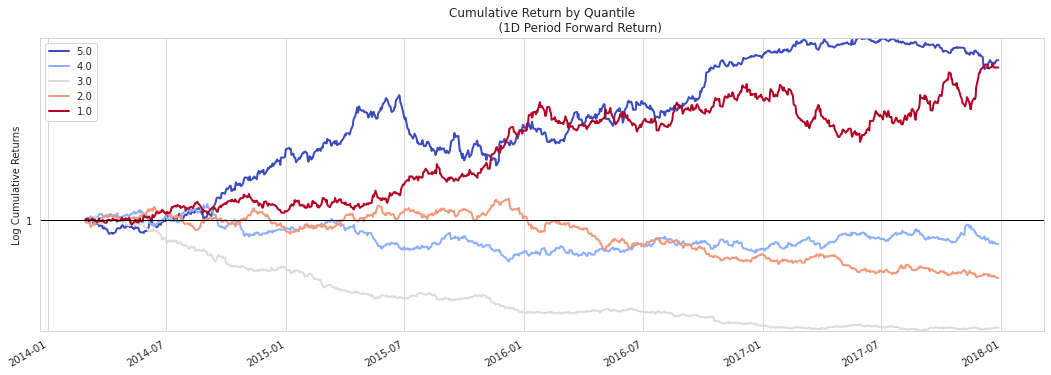

In [59]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumulativeReturns(clf_factor_data)

In [60]:
train = pd.concat([bbands_iw_factor_data['factor_quantile'],
                   target[['label']] ], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']

In [61]:
clf = LogisticRegression(random_state=42)
predictions, probabilities = modelFit(clf, X, y, cv = 35, max_train_size = 240)

In [62]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol          
2014-02-27 ABG.JO  0.505849
           ACT.JO  0.507397
           ADH.JO  0.501203
           ADI.JO  0.496557
           AFX.JO  0.498106
...                     ...
2017-12-22 TWR.JO  0.494882
           WBO.JO  0.496741
2017-12-27 CTA.JO  0.496741
           MCZ.JO  0.499064
           RBP.JO  0.494882

[57337 rows x 1 columns]

In [63]:
clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


,,1D,factor,factor_quantile
date,asset,,,
2014-02-27,ACT.JO,-0.008439,0.507397,4.0
2014-03-03,ACT.JO,-0.042553,0.507397,4.0
2014-03-07,ACT.JO,0.022222,0.510493,5.0
2014-03-20,ACT.JO,-0.036957,0.508945,5.0
2014-03-24,ACT.JO,-0.051919,0.501203,2.0
...,...,...,...,...
2017-12-14,STXWDM.JO,-0.030055,0.494882,1.0
2017-12-15,STXWDM.JO,-0.008451,0.494882,1.0
2017-12-18,STXWDM.JO,-0.025284,0.494882,1.0


In [64]:
InformationTable(clf_factor_data)

Information Analysis


,1D
IC Mean,0.017
IC Std.,0.158
Risk-Adjusted IC,0.111
t-stat(IC),NaN
p-value(IC),NaN
IC Skew,NaN
IC Kurtosis,NaN


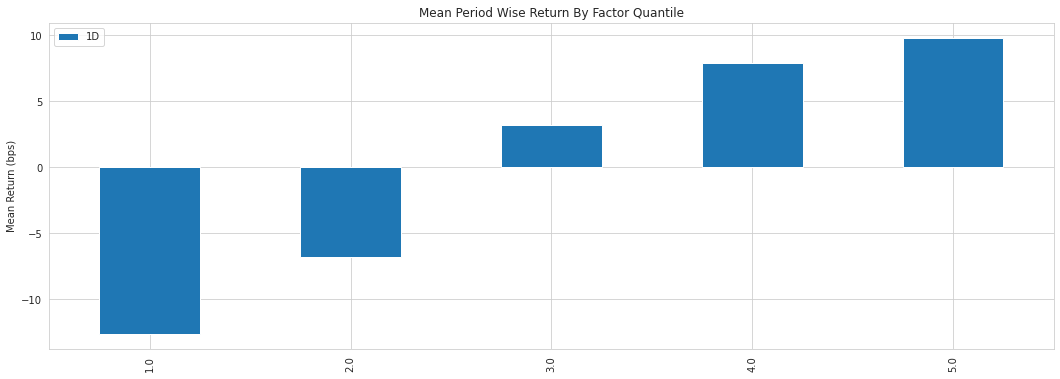

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

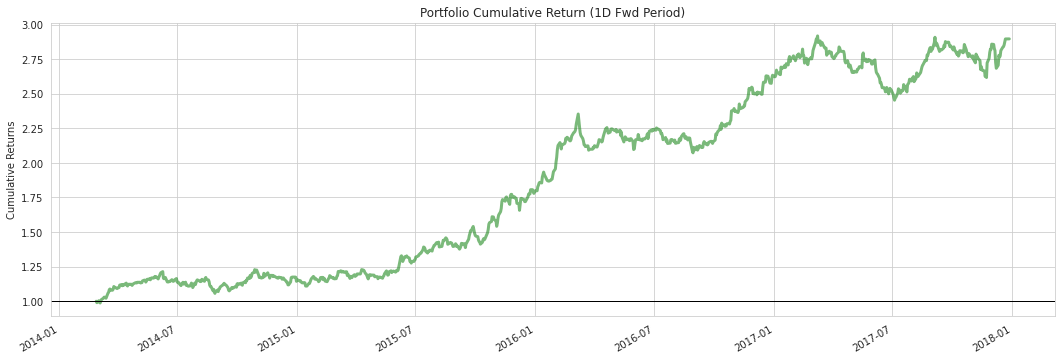

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

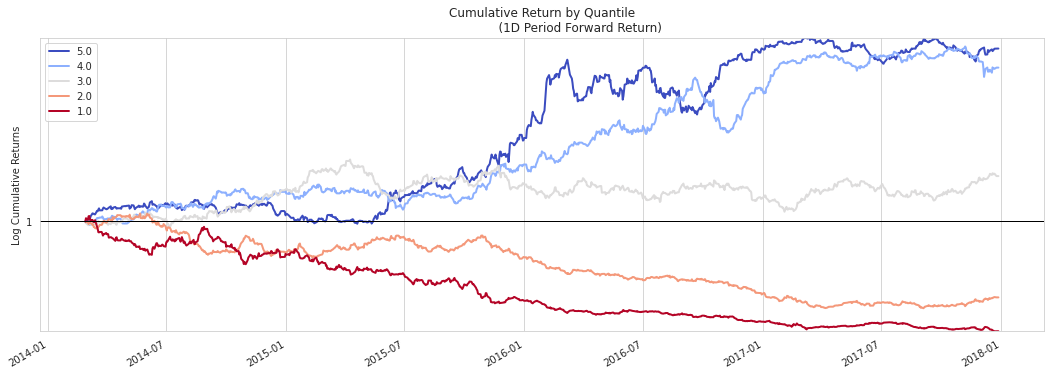

In [65]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumulativeReturns(clf_factor_data)

In [66]:
train = pd.concat([bbands_factor_data['factor_quantile'],
                   bbands_iw_factor_data['factor_quantile'],
                   target[['label']]], axis = 1).dropna()
X = train.iloc[:, :-1]
X.columns = ['bbipband', 'bbiwband']
y = train['label']

In [67]:
checkCV(X, 35, max_train_size = 240)

Fold 7 -------------------------------------------------------
Train: Length = 240
Start date: 2013-03-13
End date: 2014-02-26 

Test: Length =  33
Start date: 2014-02-27
End date: 2014-04-15
----------------------------------------------------------------
Fold 8 -------------------------------------------------------
Train: Length = 240
Start date: 2013-05-03
End date: 2014-04-15 

Test: Length =  33
Start date: 2014-04-16
End date: 2014-06-06
----------------------------------------------------------------
Fold 9 -------------------------------------------------------
Train: Length = 240
Start date: 2013-06-20
End date: 2014-06-06 

Test: Length =  33
Start date: 2014-06-09
End date: 2014-07-24
----------------------------------------------------------------
Fold 10 -------------------------------------------------------
Train: Length = 240
Start date: 2013-08-06
End date: 2014-07-24 

Test: Length =  33
Start date: 2014-07-25
End date: 2014-09-09
------------------------------------

In [68]:
clf = LogisticRegression(random_state=42)
predictions, probabilities = modelFit(clf, X, y, cv = 35, max_train_size = 240)

In [69]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol          
2014-02-27 ABG.JO  0.505142
           ACT.JO  0.506224
           ADH.JO  0.503251
           ADI.JO  0.495480
           AFX.JO  0.499277
...                     ...
2017-12-22 TWR.JO  0.495323
           WBO.JO  0.495926
2017-12-27 CTA.JO  0.495926
           MCZ.JO  0.499158
           RBP.JO  0.495684

[57337 rows x 1 columns]

In [70]:
clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


,,1D,factor,factor_quantile
date,asset,,,
2014-02-27,ACT.JO,-0.008439,0.506224,4.0
2014-03-03,ACT.JO,-0.042553,0.508034,4.0
2014-03-07,ACT.JO,0.022222,0.509746,5.0
2014-03-20,ACT.JO,-0.036957,0.510020,5.0
2014-03-24,ACT.JO,-0.051919,0.503251,3.0
...,...,...,...,...
2017-12-14,STXWDM.JO,-0.030055,0.495323,1.0
2017-12-15,STXWDM.JO,-0.008451,0.495684,2.0
2017-12-18,STXWDM.JO,-0.025284,0.495684,1.0


In [71]:
InformationTable(clf_factor_data)

Information Analysis


,1D
IC Mean,0.015
IC Std.,0.158
Risk-Adjusted IC,0.094
t-stat(IC),NaN
p-value(IC),NaN
IC Skew,NaN
IC Kurtosis,NaN


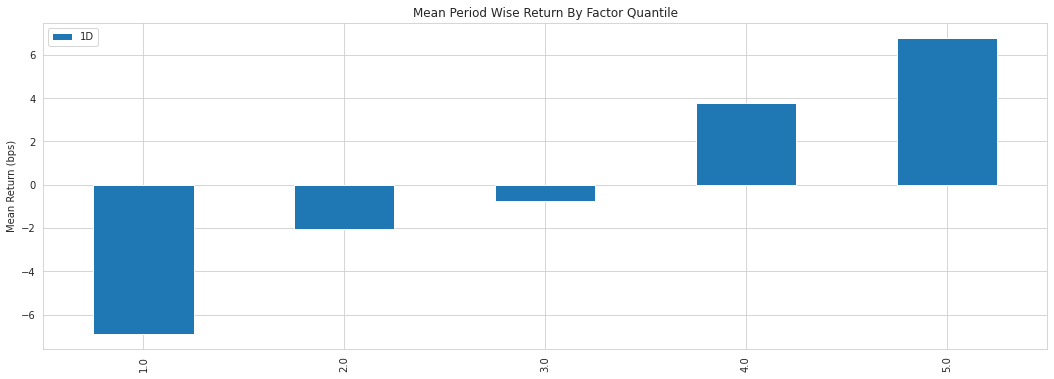

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

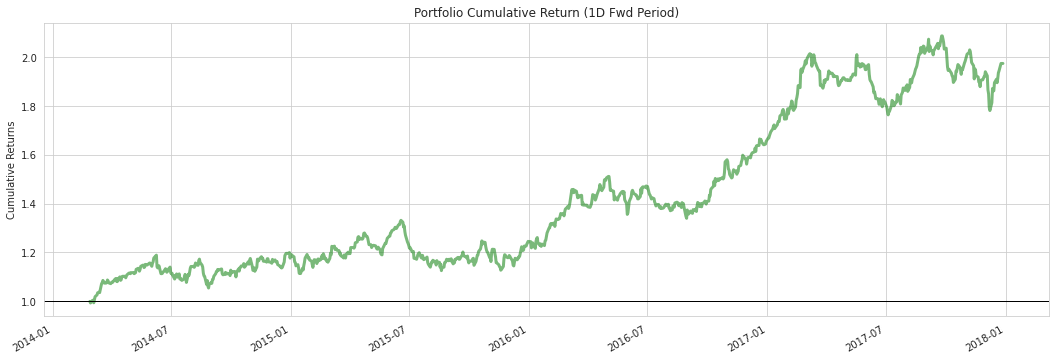

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

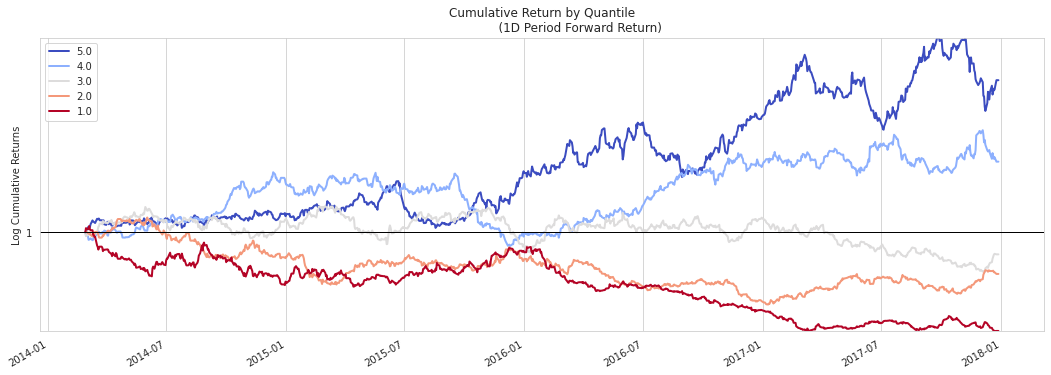

In [72]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumulativeReturns(clf_factor_data)